# Read in Data

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics,preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score

In [13]:
from nltk.corpus import stopwords

In [4]:
train_data = pd.read_csv("../input/train_v2.csv")
test_data = pd.read_csv("../input/test_v2.csv")

In [5]:
train_data.head()

,article_id,title,url,publisher,hostname,timestamp,category
0,1,Forex - Pound drops to one-month lows against ...,http://www.nasdaq.com/article/forex-pound-drop...,NASDAQ,www.nasdaq.com,1.390000e+12,4
1,2,Hertz to Exit Equipment Rental Business in $2....,http://www.foxbusiness.com/industries/2014/03/...,Fox Business,www.foxbusiness.com,1.400000e+12,2
2,3,Gold ETF inflows return,http://www.resourceinvestor.com/2014/03/09/gol...,Resource Investor,www.resourceinvestor.com,1.390000e+12,4
3,4,"Hackers call Mt. Gox CEO a liar, say he still ...",http://bgr.com/2014/03/10/mt-gox-fraud-accusat...,BGR,bgr.com,1.390000e+12,4
4,5,Gold Climbs To Near 6-Month High On Concerns A...,http://www.forbes.com/sites/kitconews/2014/03/...,Forbes,www.forbes.com,1.390000e+12,4


In [6]:
test_data.head()

,article_id,title,url,publisher,hostname,timestamp
0,1,White House plays down speedy role for US natu...,http://www.thestar.com.my/News/World/2014/03/0...,The Star Online,www.thestar.com.my,1.390000e+12
1,2,Asian Stocks Broadly Higher After Selloff,http://www.nasdaq.com/article/asian-stocks-bro...,NASDAQ,www.nasdaq.com,1.390000e+12
2,3,Herbalife Ltd. (HLF) Probe Earns Bill Ackman B...,http://www.valuewalk.com/2014/03/herbalife-ltd...,ValueWalk,www.valuewalk.com,1.390000e+12
3,4,BOE to Get Fourth Deputy Governor as Carney Fi...,http://www.businessweek.com/news/2014-03-11/bo...,Businessweek,www.businessweek.com,1.390000e+12
4,5,Pilots get scrutiny,http://www.dispatch.com/content/stories/nation...,Columbus Dispatch,www.dispatch.com,1.400000e+12


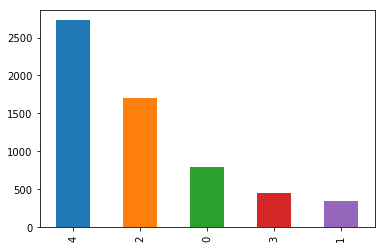

In [7]:
train_data.category.value_counts().plot(kind='bar')

# Feature Engineering

In [10]:
import re

In [8]:
le_hostname = preprocessing.LabelEncoder()
le_hostname.fit(train_data['hostname'])

LabelEncoder()

In [9]:
# Function to get the words from the headlines
def get_words( headlines ):               
    headlines_onlyletters = re.sub("[^a-zA-Z]", " ",headlines) #Remove everything other than letters     
    words = headlines_onlyletters.lower().split() #Convert to lower case, split into individual words    
    stops = set(stopwords.words("english"))  #Convert the stopwords to a set for improvised performance                 
    meaningful_words = [w for w in words if not w in stops]   #Removing stopwords
    return " ".join( meaningful_words) #Joining the words

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data["title"], train_data["category"], test_size = 0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
cleanHeadlines_train = [] #To append processed headlines
cleanHeadlines_test = [] #To append processed headlines
number_reviews_train = len(X_train) #Calculating the number of reviews
number_reviews_test = len(X_test) #Calculating the number of reviews

In [14]:
for i in range(0,number_reviews_train):
    cleanHeadline = get_words(X_train[i]) #Processing the data and getting words with no special characters, numbers or html tags
    cleanHeadlines_train.append( cleanHeadline )

In [15]:
for i in range(0,number_reviews_test):
    cleanHeadline = get_words(X_test[i]) #Processing the data and getting words with no special characters, numbers or html tags
    cleanHeadlines_test.append( cleanHeadline )

In [17]:
vectorizer = CountVectorizer(analyzer = "word", max_features = 1700)
bagOfWords_train = vectorizer.fit_transform(cleanHeadlines_train)
X_train = bagOfWords_train.toarray()

In [19]:
bagOfWords_test = vectorizer.transform(cleanHeadlines_test)
X_test = bagOfWords_test.toarray()

In [21]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_predict = logistic_regression.predict(X_test)
print(accuracy_score(Y_test,Y_predict))

0.6459369817578773


In [22]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)
print(nb.score(X_test, Y_test))

0.6285240464344942


In [25]:
print(fbeta_score(Y_test, Y_predict, average=None, beta=2))
print(fbeta_score(Y_test, Y_predict, average='macro', beta=2))
print(fbeta_score(Y_test, Y_predict, average='weighted', beta=2))

[0.60026385 0.3630363  0.59622196 0.39954338 0.75608037]
0.543029172262257
0.639202950714999
